In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset(r"C:\Users\DELL\Desktop\28.01.26\sst.day.mean.2020.nc")

In [3]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 366, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [4]:
ds.data_vars

Data variables:
    sst      (time, lat, lon) float32 2GB ...

In [5]:
ds.coords

Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

In [6]:
sst = ds["sst"]
sst1=ds.sst

In [7]:
st_indian = sst.sel(
    time=slice("2020-09-01", "2020-09-30"),
)

In [9]:
sst_mean = sst_indian.mean(dim="time")

NameError: name 'sst_indian' is not defined

In [10]:
sst = ds["sst"]
sst_indian = sst.sel(time=slice("2020-09-01", "2020-09-30"))
sst_mean = sst_indian.mean(dim="time")

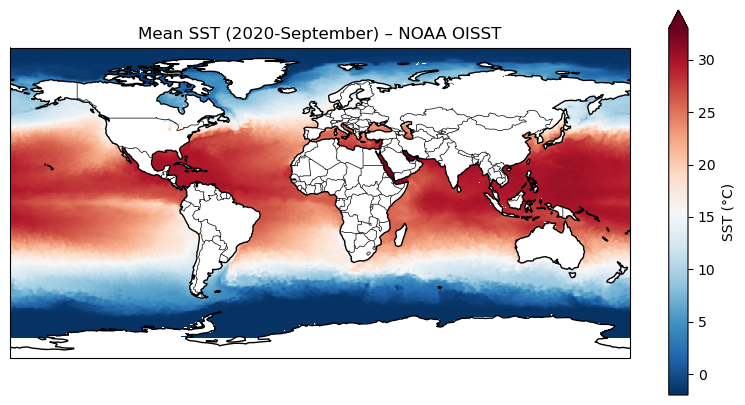

In [11]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=-2,
    vmax=33,
    cbar_kwargs={"label": "SST (°C)"}
)
##vmin
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_title("Mean SST (2020-September) – NOAA OISST")
plt.show()

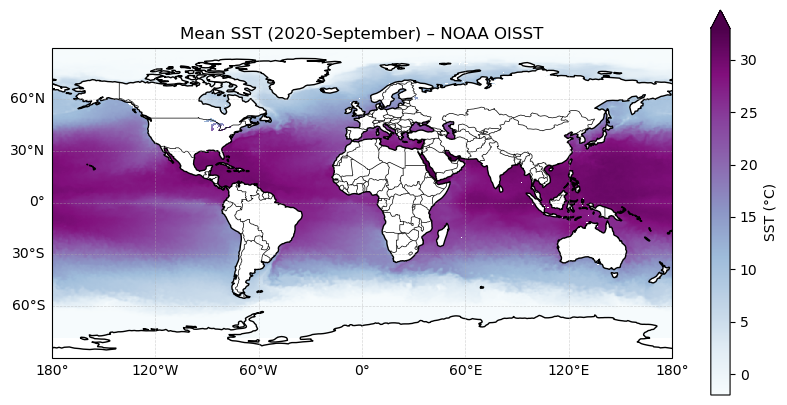

In [26]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="BuPu",
    vmin=-2,
    vmax=33,
    cbar_kwargs={"label": "SST (°C)"}
)
##vmin
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_title("Mean SST (2020-September) – NOAA OISST")
gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    alpha=0.5
)

gl.top_labels = False
gl.right_labels = False

plt.show()

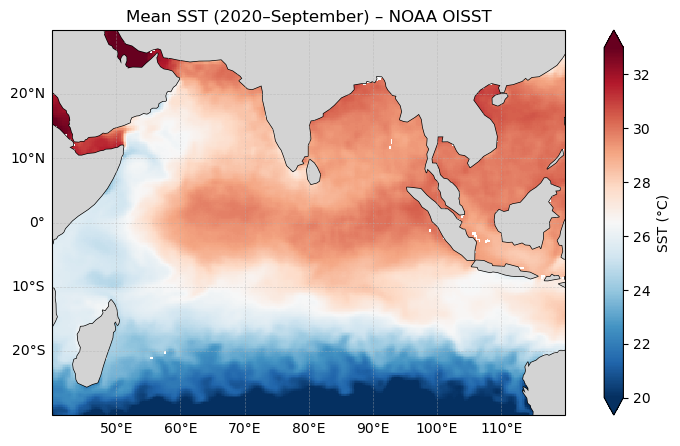

In [15]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

# ---- Code 2 (extent) placed here ----
ax.set_extent([40, 120, -30, 30], crs=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=20,
    vmax=33,
    cbar_kwargs={
        "label": "SST (°C)",
        "ticks": np.arange(20, 33, 2)   # ---- Code 2 (ticks) placed here ----
    }
)

# ---- Code 2 (land facecolor) placed here ----
ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=2)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

ax.set_title("Mean SST (2020–September) – NOAA OISST")

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    alpha=0.5
)
gl.top_labels = False
gl.right_labels = False

plt.show()

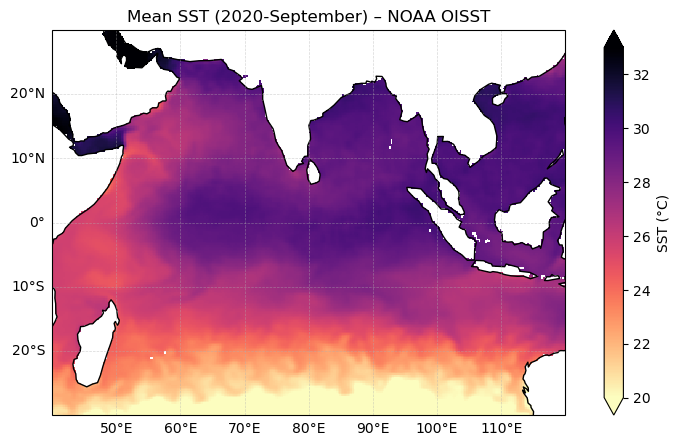

In [16]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([40, 120, -30, 30], crs=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="magma_r",
    vmin=20,
    vmax=33,
    cbar_kwargs={
        "label": "SST (°C)",
        "ticks": np.arange(20, 33, 2)
    }
)

ax.coastlines()
ax.set_title("Mean SST (2020-September) – NOAA OISST")

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    alpha=0.5
)

gl.top_labels = False
gl.right_labels = False

plt.show()

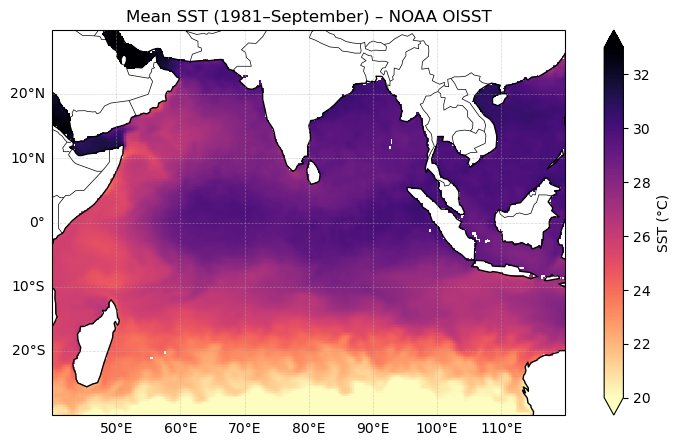

In [17]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([40, 120, -30, 30], crs=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="magma_r",
    vmin=20,
    vmax=33,
    cbar_kwargs={
        "label": "SST (°C)",
        "ticks": np.arange(20, 33, 2)
    }
)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_title("Mean SST (1981–September) – NOAA OISST")

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    alpha=0.5
)
gl.top_labels = False
gl.right_labels = False

plt.show()

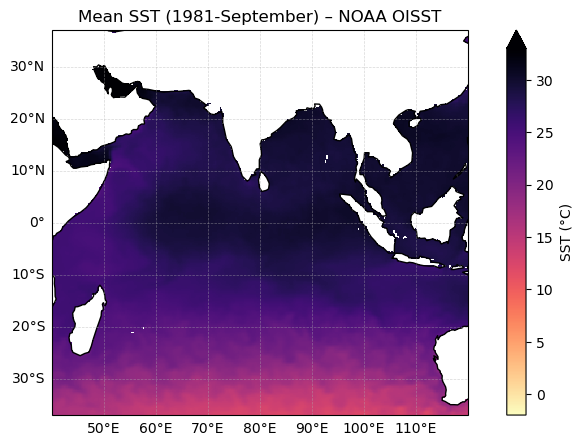

In [18]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="magma_r",
    vmin=-2,
    vmax=33,
    cbar_kwargs={"label": "SST (°C)"}
)

ax.coastlines()
ax.set_title("Mean SST (1981-September) – NOAA OISST")
ax.set_extent([40, 120, -30, 30])

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    alpha=0.5
)

gl.top_labels = False
gl.right_labels = False


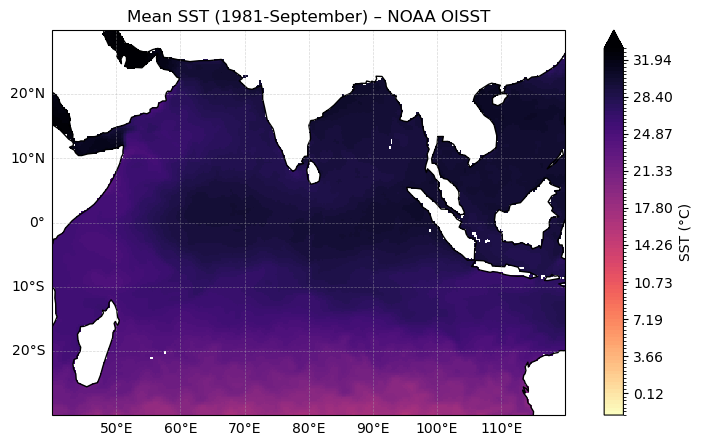

In [19]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="magma_r",
    vmin=-2,
    vmax=33,
    levels=100,                     # 🔥 MORE color divisions
    cbar_kwargs={"label": "SST (°C)"}
)

ax.coastlines()
ax.set_title("Mean SST (1981-September) – NOAA OISST")
ax.set_extent([40, 120, -30, 30], crs=ccrs.PlateCarree())

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    alpha=0.5
)

gl.top_labels = False
gl.right_labels = False

plt.show()

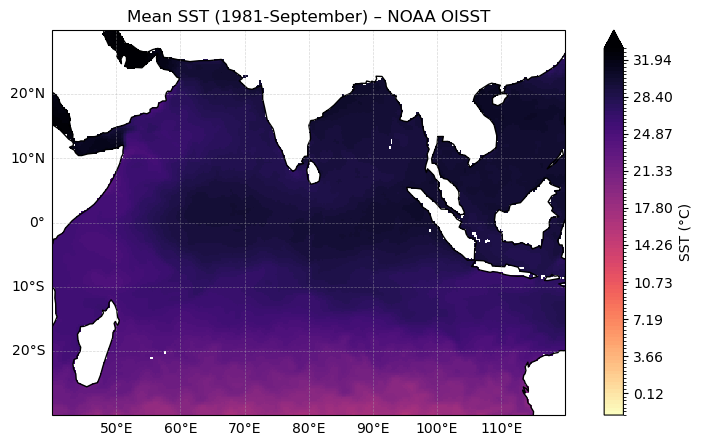

In [20]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="magma_r",
    vmin=-2,
    vmax=33,
    levels=100,                     # 🔥 MORE color divisions
    cbar_kwargs={"label": "SST (°C)"}
)

ax.coastlines()
ax.set_title("Mean SST (1981-September) – NOAA OISST")
ax.set_extent([40, 120, -30, 30], crs=ccrs.PlateCarree())

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    alpha=0.5
)

gl.top_labels = False
gl.right_labels = False

plt.show()

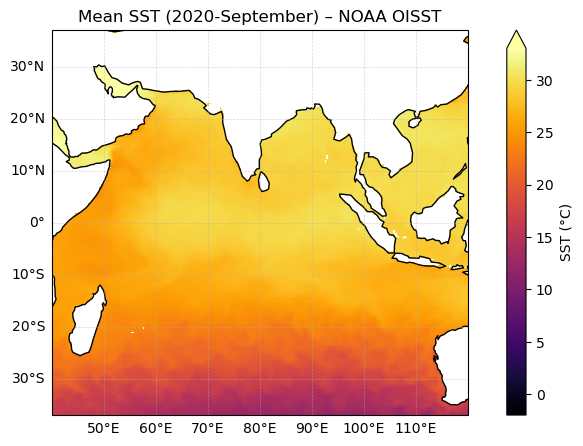

In [27]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

sst_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="inferno",
    vmin=-2,
    vmax=33,
    cbar_kwargs={"label": "SST (°C)"}
)

ax.coastlines()
ax.set_title("Mean SST (2020-September) – NOAA OISST")
ax.set_extent([40, 120, -30, 30])

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    alpha=0.5
)

gl.top_labels = False
gl.right_labels = False